<a href="https://colab.research.google.com/github/Vidsmo/RydeHop/blob/main/stock_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
!pip install yfinance --upgarde



Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --upgarde


In [22]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")



In [23]:
import yfinance as yf

symbol = input("Enter stock symbol: ").upper()

df = yf.download(symbol, period="1mo", interval="1d")
df = df[['Close']]
print(df.tail())


Enter stock symbol: tsla


[*********************100%***********************]  1 of 1 completed

Price            Close
Ticker            TSLA
Date                  
2025-11-10  445.230011
2025-11-11  439.619995
2025-11-12  430.600006
2025-11-13  401.989990
2025-11-14  404.350006


In [24]:
df["ma7"] = df["Close"].rolling(7).mean()
df["ma14"] = df["Close"].rolling(14).mean()

df.tail()

Price,Close,ma7,ma14
Ticker,TSLA,,
Date,,,
2025-11-10,445.230011,450.274288,449.155003
2025-11-11,439.619995,447.854287,449.201431
2025-11-12,430.600006,442.458575,447.888574
2025-11-13,401.989990,436.420000,445.622144
2025-11-14,404.350006,428.174286,442.188572


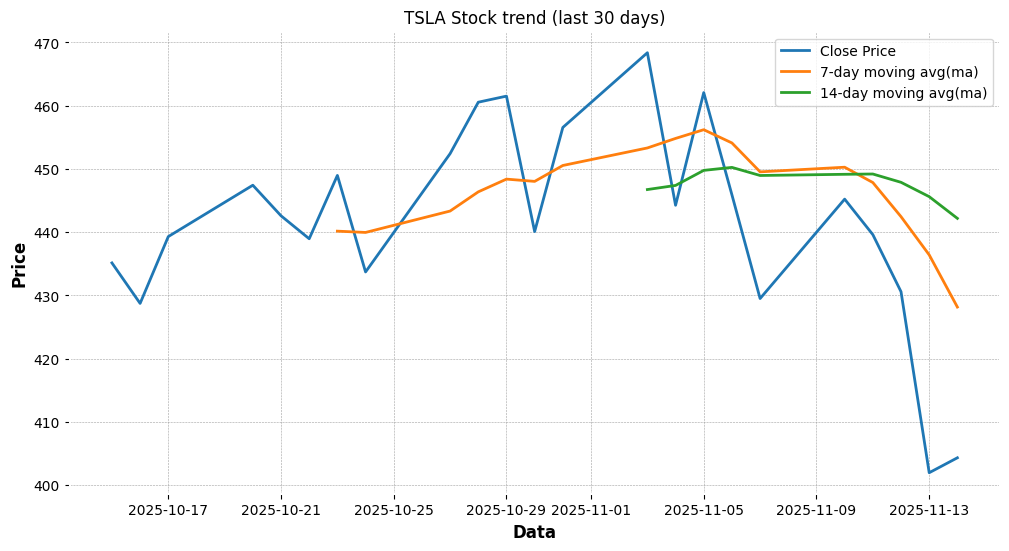

In [25]:
plt.figure(figsize=(12,6))
plt.plot(df.index,df['Close'],label='Close Price',linewidth=2)
plt.plot(df.index,df['ma7'],label='7-day moving avg(ma)',linewidth=2)
plt.plot(df.index,df['ma14'],label='14-day moving avg(ma)',linewidth=2)
plt.title(f"{symbol} Stock trend (last 30 days)")
plt.xlabel("Data")
plt.ylabel("Price")
plt.grid(True)
plt.legend()
plt.show()

In [26]:
!pip install plotly

Enter stock symbol: tsla


[*********************100%***********************]  1 of 1 completed


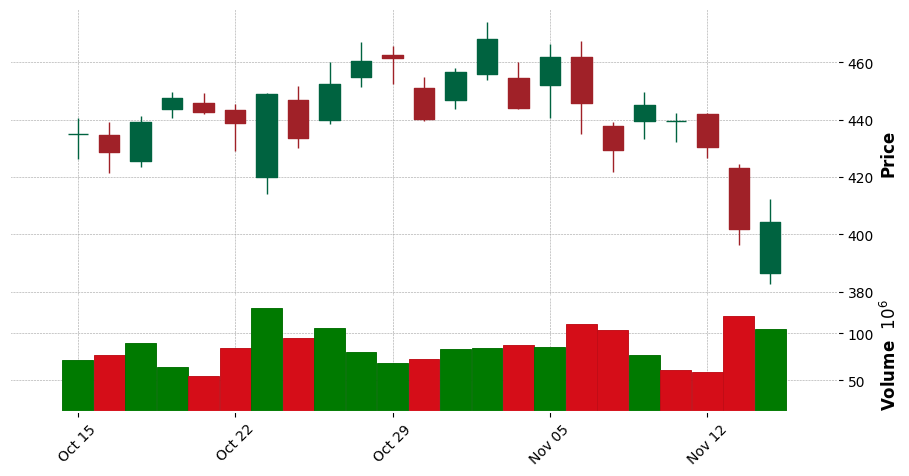

In [27]:
import yfinance as yf
import mplfinance as mpf

symbol = input("Enter stock symbol: ").upper()

df_full = yf.download(symbol, period="1mo", interval="1d")
df_full.columns = [col[0] if isinstance(col, tuple) else col for col in df_full.columns]

mpf.plot(df_full, type='candle', style='charles', volume=True, figratio=(12,6))


In [28]:
from sklearn.linear_model import LinearRegression
import numpy as np
import yfinance as yf
symbol = symbol.upper()
df = yf.download(symbol, period="1mo", interval="1d")
df = df[['Close']].dropna()
df['Number'] = np.arange(len(df))
X = df[['Number']]
y = df['Close']
model = LinearRegression()
model.fit(X, y)
next_day = [[len(df)]]
predicted_price = float(model.predict(next_day)[0])
print(f"\nPredicted next-day price for {symbol}: ₹{predicted_price:.2f}")


[*********************100%***********************]  1 of 1 completed


Predicted next-day price for TSLA: ₹433.34
